In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('processed_dataset_separated.csv')
print(df)

             playlist_name  num_tracks  num_albums  num_followers  duration  \
0                Christmas          15          14              5   2647.16   
1     volleyball playlist           46          43              5  10592.58   
2            Christmas Mix          32          28             22   6772.22   
3                 Worship           35          31             11   8320.64   
4                      NEW          16           6              6   4643.22   
...                    ...         ...         ...            ...       ...   
7983             the goods          40          39              5   8891.28   
7984               Summer           16          16              6   3433.29   
7985               mornin'          24          24              6   5458.38   
7986                  papa          16          16              7   3809.76   
7987                 sleep           8           8             11   1664.92   

                 artist0            artist1        

In [20]:
playlist_columns = df.columns[df.columns.str.startswith('playlist_name')]
track_columns = df.columns[df.columns.str.startswith('track')]

In [28]:
#a tracks to playlists dictionary
track_playlists = {}
for index, row in df.iterrows():
    playlist_names = row[playlist_columns]
    tracks = row[track_columns]
    for playlist_name, track in zip(playlist_names, tracks):
        if pd.notnull(track):
            if track not in track_playlists:
                track_playlists[track] = set()
            track_playlists[track].add(playlist_name)

print(track_playlists)


{'Mele Kalikimaka - Single Version': {'Christmas'}, 'Started From the Bottom': {'School dance', 'volleyball playlist ', 'Started From the Bottom'}, 'Christmas Card From a Hooker in Minneapolis': {'Christmas Mix'}, 'Worn': {'Worship '}, 'Free': {'NEW', 'End Of Summer!', 'Bangers'}, 'SHAKE THAT BRASS (feat. Taeyeon)': {'Music.'}, 'Steve McQueen': {'July 2013'}, 'You Make My Dreams - Remastered': {'Classic ', '#oldies', 'oldies/goodies', 'yacht rock', 'Take Me Back'}, 'Lucky Star': {"1980's"}, "Wouldn't It Be Nice - 2000 - Remaster": {'Summertime ', '70s'}, 'Wasted On You (feat. ROZES)': {'MVP ', 'Fall 2016'}, 'Drowsy': {'vibe'}, 'Bailando Provocas': {'Reggaeton'}, "You Don't Wanna Go 2 War - feat. Master P, C-Murder, Silkk The Shocker, Mystikal": {'No Limit'}, "Swingin' Party": {'idk man'}, 'Ghetto Dreams': {'throwback'}, 'Lovesick Teenagers': {'summer jamz'}, 'Boat Song': {'Lighthouse'}, 'When Will My Life Begin - From "Tangled"/Soundtrack Version': {'Disney Songs', 'DISNEY BOPS', 'Disn

In [22]:
G = nx.Graph()
for track, playlists in track_playlists.items():
    playlists_list = list(playlists)
    for i in range(len(playlists_list)):
        for j in range(i + 1, len(playlists_list)):
            G.add_edge(playlists_list[i], playlists_list[j])
print(G)

Graph with 2217 nodes and 3273 edges


C:\Users\mihai\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mihai\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127876 (\N{CHRISTMAS TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mihai\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mihai\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mihai\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current f

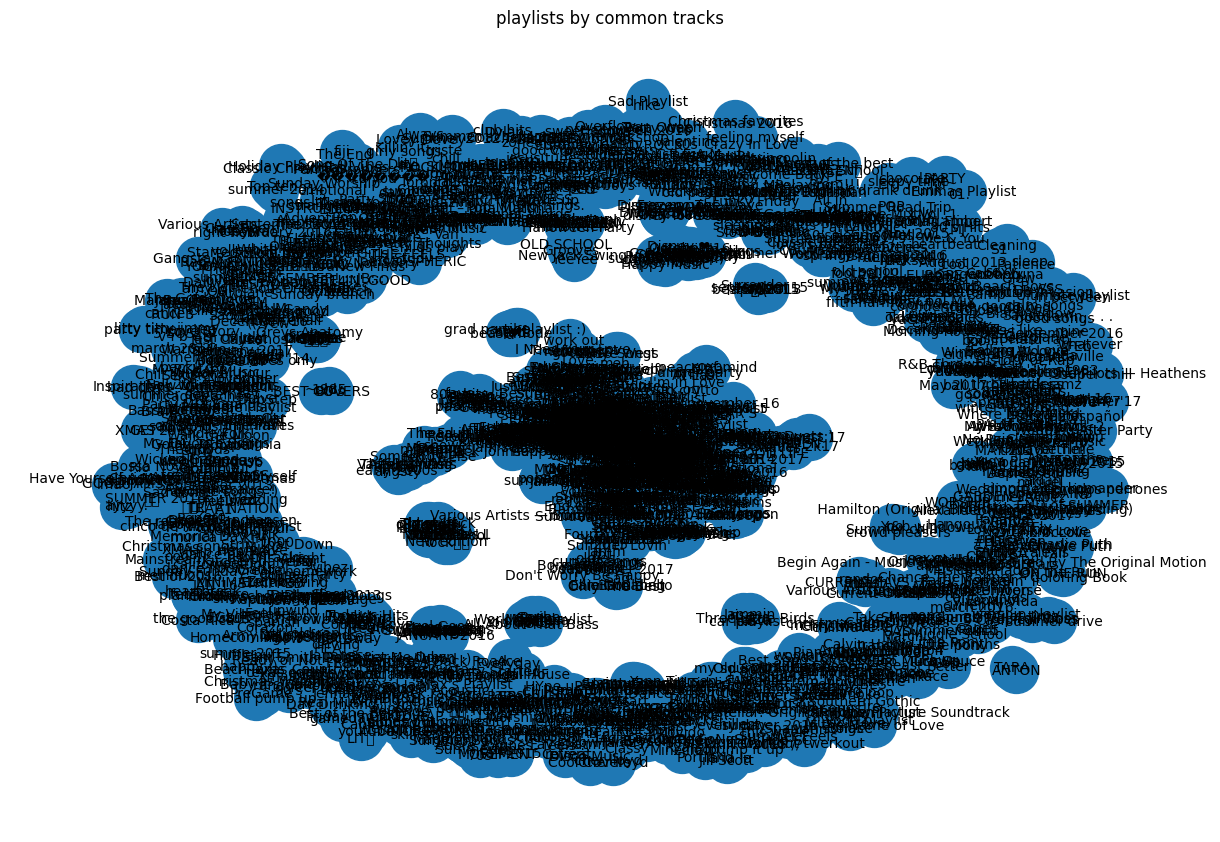

In [23]:
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos=pos, with_labels=True, node_size=1000, font_size=10)
plt.title('playlists by common tracks')
plt.show()

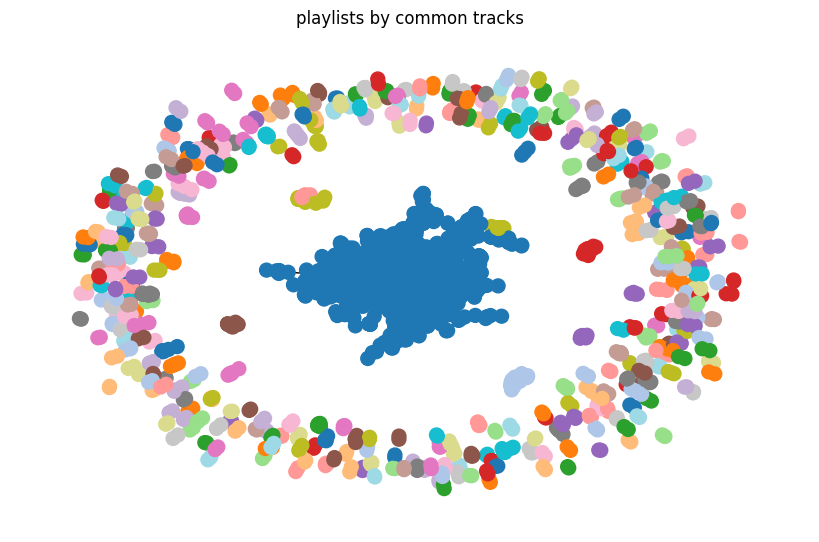

In [45]:
pos = nx.spring_layout(G)
color_map = {}
for i, component in enumerate(nx.connected_components(G)):
    for node in component:
        color_map[node] = plt.cm.tab20(i % 20) 


plt.figure(figsize=(8, 5))
nx.draw(G, pos=pos, node_color=[color_map[node] for node in G.nodes()], node_size=100, with_labels=False)
plt.title('playlists by common tracks')
plt.show()

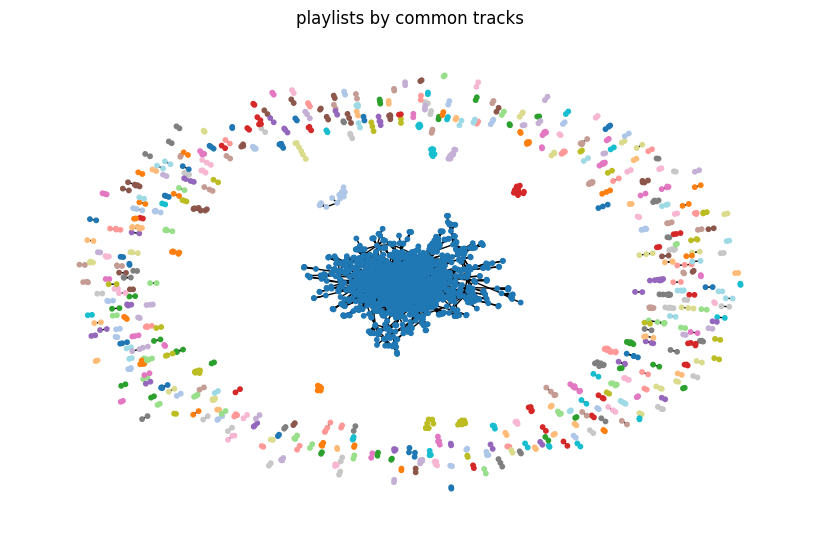

In [46]:
pos = nx.spring_layout(G)
color_map = {}
for i, component in enumerate(nx.connected_components(G)):
    for node in component:
        color_map[node] = plt.cm.tab20(i % 20) 


plt.figure(figsize=(8, 5))
nx.draw(G, pos=pos, node_color=[color_map[node] for node in G.nodes()], node_size=10, with_labels=False)
plt.title('playlists by common tracks')
plt.show()

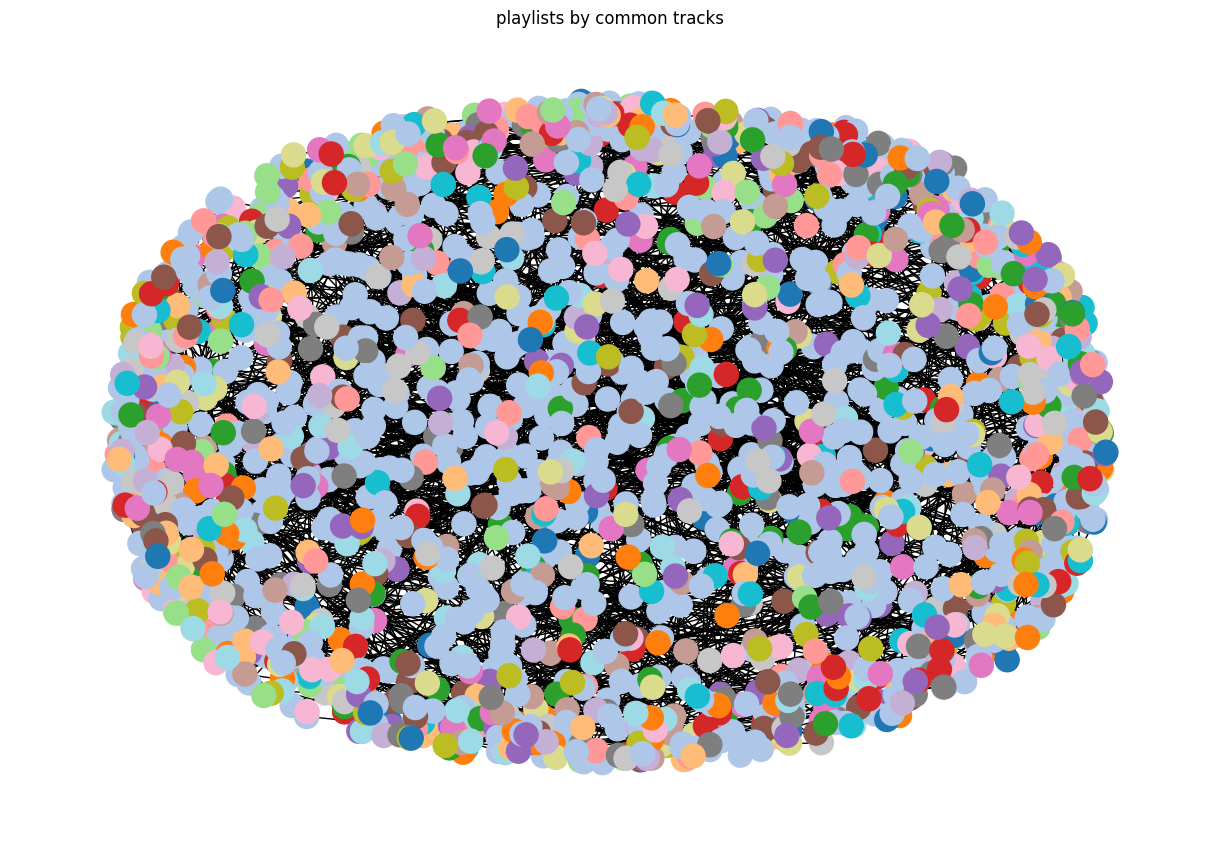

In [33]:
pos = nx.spring_layout(G, k=0.3, iterations=50)  
color_map = {}
for i, component in enumerate(nx.connected_components(G)):
    for node in component:
        color_map[node] = plt.cm.tab20(i % 20)  


plt.figure(figsize=(12, 8))
nx.draw(G, pos=pos, node_color=[color_map[node] for node in G.nodes()], node_size=300, with_labels=False)
plt.title('playlists by common tracks')
plt.show()

In [26]:
clusters = list(nx.connected_components(G))

num_clusters = len(clusters)
print(f'number clusters: {num_clusters}')

number clusters: 511


In [34]:

album_columns = df.columns[df.columns.str.startswith('album')]
#a albums to playlists dictionary
album_playlists = {}
for index, row in df.iterrows():
    playlist_names = row[playlist_columns]
    albums = row[album_columns]
    for playlist_name, album in zip(playlist_names, albums):
        if pd.notnull(album):
            if album not in album_playlists:
                album_playlists[album] = set()
            album_playlists[album].add(playlist_name)

print(album_playlists)

{'White Christmas': {'Christmas', 'Classic christmas'}, 'Nothing Was The Same': {'volleyball playlist ', 'Writing Music', 'R&B/Rap', 'Started From the Bottom', 'chill', 'PBR&B', 'best of drake', 'School dance', 'throwback rap', 'CHILLIn'}, 'New Coat of Paint -- Waits Tribute': {'Christmas Mix'}, 'The Struggle': {'Worship '}, 'From the Ground - EP': {'NEW'}, 'The 1st Mini Album ‘Beautiful’': {'Music.'}, "Hurry Up, We're Dreaming": {'Spring Forward', "Chillin'", 'Darkness', 'July 2013', 'Drawing Music', 'Freedom'}, 'Voices': {'Positive Vibes', 'Classic ', 'Yacht Rock', 'Hipster', '#oldies', 'oldies/goodies', 'Sabine', 'yacht rock', 'Take Me Back'}, 'Madonna': {"1980's"}, 'Pet Sounds': {'Summertime ', '70s'}, 'Wasted On You (feat. ROZES)': {'MVP ', 'Fall 2016'}, 'Drowsy': {'vibe', 'uh'}, 'Mas Flow': {'Reggaeton'}, 'Unlady Like': {'No Limit'}, 'World, You Need a Change of Mind': {'idk man'}, 'Ghetto Dreams': {'throwback'}, 'Beast Rest Forth Mouth': {'summer jamz'}, "When I'm With You": {'L

In [39]:
G2 = nx.Graph()
for album, playlists in album_playlists.items():
    playlists_list = list(playlists)
    for i in range(len(playlists_list)):
        for j in range(i + 1, len(playlists_list)):
            G2.add_edge(playlists_list[i], playlists_list[j])
print(G2)

Graph with 2984 nodes and 7674 edges


In [41]:
clusters2 = list(nx.connected_components(G2))

num_clusters2 = len(clusters2)
print(f'number clusters: {num_clusters2}')

number clusters: 441


C:\Users\mihai\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mihai\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127876 (\N{CHRISTMAS TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mihai\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mihai\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mihai\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from current font.
  fig.canv

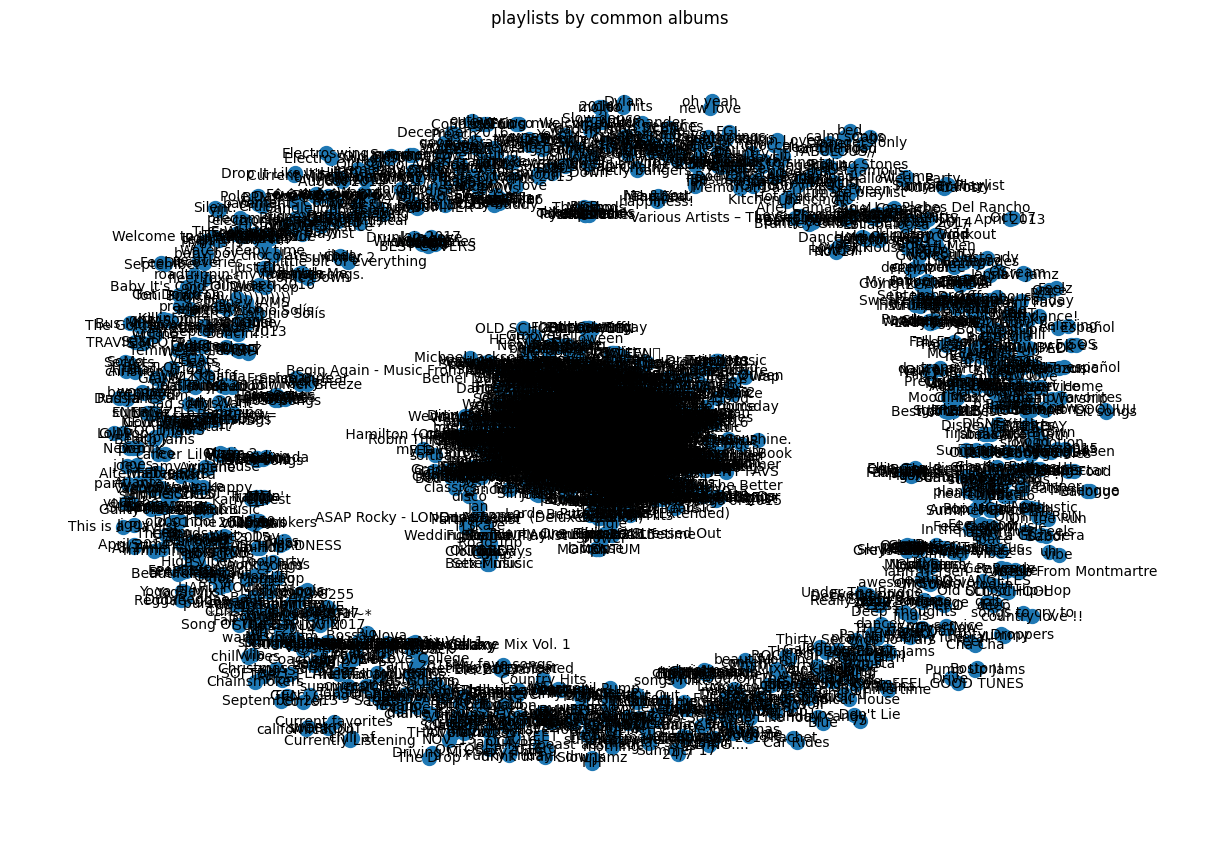

In [43]:
pos = nx.spring_layout(G2)
plt.figure(figsize=(12, 8))
nx.draw(G2, pos=pos, with_labels=True, node_size=100, font_size=10)
plt.title('playlists by common albums')
plt.show()

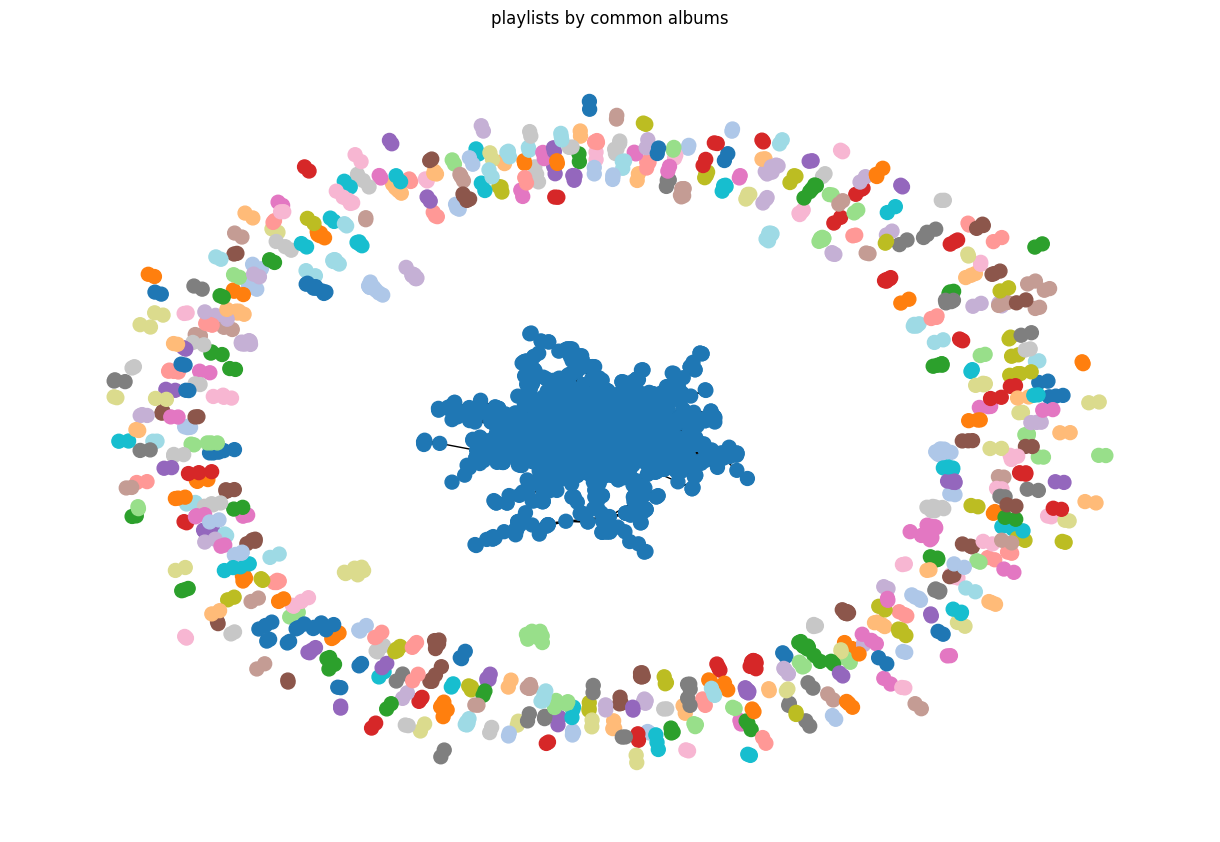

In [44]:
pos = nx.spring_layout(G2)
color_map = {}
for i, component in enumerate(nx.connected_components(G2)):
    for node in component:
        color_map[node] = plt.cm.tab20(i % 20) 


plt.figure(figsize=(12, 8))
nx.draw(G2, pos=pos, node_color=[color_map[node] for node in G2.nodes()], node_size=100, with_labels=False)
plt.title('playlists by common albums')
plt.show()

In [ ]:
artist_columns = df.columns[df.columns.str.startswith('artist')]

#a artist to playlists dictionary
artist_playlists = {}
for index, row in df.iterrows():
    playlist_names = row[playlist_columns]
    artist = row[artist_columns]
    for playlist_name, artist in zip(playlist_names, artists):
        if pd.notnull(artist):
            if artist not in artist_playlists:
                artist_playlists[artist] = set()
            artist_playlists[artist].add(playlist_name)

print(artist_playlists)